In [7]:
import numpy as np

# Generación de tiempos aleatorios Exp(lambda)
def randExp(lamb,size=1):    
    pt = np.random.rand(size)
    return (-1/lamb)*np.log(pt)

# Distribución exponencial Exp(lambda)
def expDist(lamb,x):
    return lamb*np.exp(-lamb*x)

In [8]:
from operator import itemgetter
import matplotlib.pyplot as plt
def initilization(m, c, Lamb, Mu):
    global M,C,lamb,mu
    M = m
    C = c
    lamb = Lamb
    mu = Mu
    if ((lamb/mu < 0.1)or(lamb/mu > 0.4) or (C > M)):
        print("Ingrese unos valores validos para lambda")
        return
    else:
        global U, B ,arrivals
        B = arrivals = U = 0
        global FEL
        FEL = []
        for i in range(M):
            tiempo = randExp(lamb) 
            FEL.append((i,tiempo))
        FEL.sort(key=itemgetter(1))
        return FEL

In [9]:
def arrive(p_bloqueo):
    global arrivals, U, B
    arrivals += 1
    if U == C:
        B += 1
        if (arrivals%sample==0):
            list_arrives.append(arrivals)
            p_bloqueo = p_bloqueo + (B/arrivals)
            #print("p_bloqueo:",p_bloqueo)
            #print("B:", B)
            #print("arrivals:", arrivals)
            list_bloqueos.append(p_bloqueo)
        # Evento Arribo por bloqueo
        tiempoArribo = eventoActual[1] + randExp(lamb)
        FEL.append((eventoActual[0], tiempoArribo))
        FEL.sort(key=itemgetter(1))
    else:
        U +=1
        # Evento Salida por atención
        tiempoSalida = eventoActual[1] + randExp(mu)
        FEL.append((eventoActual[0]+M, tiempoSalida))
        FEL.sort(key=itemgetter(1))
    

In [10]:
def exit():
    global U
    U -= 1
    # Evento Arribo por salida
    tiempoArribo = eventoActual[1] + randExp(lamb)
    FEL.append((eventoActual[0]-M, tiempoArribo))
    FEL.sort(key=itemgetter(1))
    

Probabilidad de bloqueo:0.24


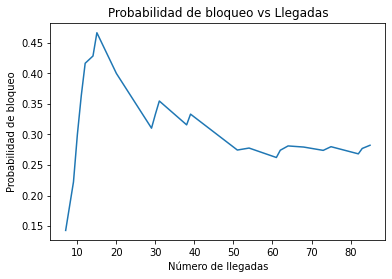

In [11]:
initilization(5,2,3,10) # (M, C, lambda, mu)
list_bloqueos = []
list_arrives = []
P_bloqueo = 0
P_bloqueo_total = 0
LLEGADAS_1 = 10**2
sample = LLEGADAS_1/100
while (arrivals < LLEGADAS_1):
    eventoActual = FEL.pop(0)
    #print(eventoActual)
    if eventoActual[0] < M:
        # Evento de llegada
        arrive(P_bloqueo)
        idEvento = eventoActual[0]
        #print(idEvento)
    else:
        # Evento de salida
        exit()
        idEvento = eventoActual[0] - M
        #print(idEvento)
    #print(counter)
P_bloqueo_total_1 = B/LLEGADAS_1
print("Probabilidad de bloqueo:{}".format(P_bloqueo_total_1))
plt.plot(list_arrives, list_bloqueos)
plt.ylabel('Probabilidad de bloqueo')
plt.xlabel('Número de llegadas')
plt.title("Probabilidad de bloqueo vs Llegadas")
plt.show()